#Convolutional neural networks and computer vision with tensorflow

computer vision is the practive of writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in front


## Get the data

the images in this section are from the food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However I modified it to only use two classes (pizza & steak) using the image data modification notebook: htt

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-02-23 19:16:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   137MB/s    in 0.8s    

2025-02-23 19:16:52 (137 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## inspect the data (become one with it)

very crucial step at the beginning of any machine learning project is becoming one with the data

and for a computer vision project, this usually means visualizing many samples of the data



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

# walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in 'pizza_steak'.
there are 2 directories and 0 images in 'pizza_steak/test'.
there are 0 directories and 250 images in 'pizza_steak/test/pizza'.
there are 0 directories and 250 images in 'pizza_steak/test/steak'.
there are 2 directories and 0 images in 'pizza_steak/train'.
there are 0 directories and 750 images in 'pizza_steak/train/pizza'.
there are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [6]:
# the extra file in the pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Feb 23 19:16 .
drwxr-xr-x 1 root root 4096 Feb 23 19:16 ..
drwxr-xr-x 4 root root 4096 Feb 23 19:16 test
drwxr-xr-x 4 root root 4096 Feb 23 19:16 train


In [7]:
# another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [8]:
# to visualize images, letz get the class names programmatically

In [9]:
# get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) #created a list of class_names from the subdirectory
print(class_names)

['pizza' 'steak']


In [10]:
# now visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setup target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


['644777.jpg']
Image shape: (512, 512, 3)


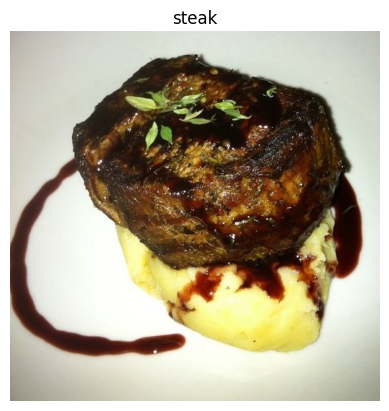

In [11]:
# view a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [12]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[170, 165, 159],
        [170, 165, 159],
        [171, 166, 160],
        ...,
        [182, 185, 176],
        [181, 184, 175],
        [180, 183, 174]],

       [[171, 166, 160],
        [171, 166, 160],
        [172, 167, 161],
        ...,
        [183, 186, 177],
        [182, 185, 176],
        [181, 184, 175]],

       [[172, 167, 161],
        [172, 167, 161],
        [174, 169, 163],
        ...,
        [184, 187, 178],
        [183, 186, 177],
        [183, 186, 177]],

       ...,

       [[148, 141, 123],
        [149, 142, 124],
        [149, 142, 124],
        ...,
        [150, 153, 134],
        [151, 154, 135],
        [153, 156, 137]],

       [[147, 140, 122],
        [148, 141, 123],
        [149, 142, 124],
        ...,
        [148, 151, 132],
        [148, 151, 132],
        [151, 154, 135]],

       [[146, 139, 121],
        [148, 141, 123],
        [150, 143, 125],
        ...,
        [147, 150, 13

In [13]:
# view the image shape
img.shape # returns width, height, color channels

(512, 512, 3)

In [14]:
# get all the pixel values between 0 & 1
img/255.

array([[[0.66666667, 0.64705882, 0.62352941],
        [0.66666667, 0.64705882, 0.62352941],
        [0.67058824, 0.65098039, 0.62745098],
        ...,
        [0.71372549, 0.7254902 , 0.69019608],
        [0.70980392, 0.72156863, 0.68627451],
        [0.70588235, 0.71764706, 0.68235294]],

       [[0.67058824, 0.65098039, 0.62745098],
        [0.67058824, 0.65098039, 0.62745098],
        [0.6745098 , 0.65490196, 0.63137255],
        ...,
        [0.71764706, 0.72941176, 0.69411765],
        [0.71372549, 0.7254902 , 0.69019608],
        [0.70980392, 0.72156863, 0.68627451]],

       [[0.6745098 , 0.65490196, 0.63137255],
        [0.6745098 , 0.65490196, 0.63137255],
        [0.68235294, 0.6627451 , 0.63921569],
        ...,
        [0.72156863, 0.73333333, 0.69803922],
        [0.71764706, 0.72941176, 0.69411765],
        [0.71764706, 0.72941176, 0.69411765]],

       ...,

       [[0.58039216, 0.55294118, 0.48235294],
        [0.58431373, 0.55686275, 0.48627451],
        [0.58431373, 0

## my end-to-end example

lets build a concolutional neural network to find patterns in the images, more specifically I need a way to:

* Load the images
* Preprocess the images
* Build a CNN to find patterns in the images
* compile the CNN
* fit the CNN to the training data

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# set the seed
tf.random.set_seed(42)

# preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup paths to our data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# create a CNN model (same as the Tiny VGG in the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer in input shape
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation="relu" == tf.keras.layers
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary classifier
])

# compile our CNN
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 314ms/step - accuracy: 0.6319 - loss: 0.6317 - val_accuracy: 0.7800 - val_loss: 0.4521
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 191ms/step - accuracy: 0.7944 - loss: 0.4493 - val_accuracy: 0.8240 - val_loss: 0.3797
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 223ms/step - accuracy: 0.8234 - loss: 0.4167 - val_accuracy: 0.8580 - val_loss: 0.3406
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.8044 - loss: 0.3998 - val_accuracy: 0.7940 - val_loss: 0.4175
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8229 - loss: 0.3952 - val_accuracy: 0.8520 - val_loss: 0.3498


if the above cell is taking longer than 10sec per epoch, use a GPU

In [16]:
len(train_data)

47

In [17]:
# 47/47 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.5240 - loss: 0.6982 - val_accuracy: 0.6960 - val_loss: 0.6034


In [18]:
# get a model summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

replicating the previous model with my image data

In [19]:
# set random seed
tf.random.set_seed(42)

# create a model to replicate the Tensorflow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 0.5695 - loss: 1.2829 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.5217 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.5150 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.5073 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.4691 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6931


In [20]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

steps_per_epoch = train_data.samples // train_data.batch_size validation_steps = test_data.samples // test_data.batch_size

history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=steps_per_epoch, # vorher steps_per_epoch=len(train_data) validation_data=test_data, validation_steps=validation_steps, # vorher validation_steps=len(test_data))

despite having 20x more parameters than the CNN (model_1), model_2 performs terribly... lets try to improve it

add an extra layer or increase the hidden units?


In [21]:
#set random seed
tf.random.set_seed(42)

#create the model (same as above but lets step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.5540 - loss: 4.2259 - val_accuracy: 0.6580 - val_loss: 1.5795
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.6805 - loss: 1.4372 - val_accuracy: 0.5920 - val_loss: 1.4169
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.7067 - loss: 0.8188 - val_accuracy: 0.8020 - val_loss: 0.4340
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.7845 - loss: 0.5560 - val_accuracy: 0.7340 - val_loss: 0.6285
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.7372 - loss: 0.8332 - val_accuracy: 0.7780 - val_loss: 0.6292


In [22]:
# get summary of recent model
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

## binary classification: lets break it down

1. Become one with the data, best way is visualizing
2. preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning the data into batches)
3. create a model (start with a baseline)
4. fit the model
5. evaluate the model
6. adjust different parameters and improve the model (try to beat the basline)
7. repeat until satisfied

### 1. Become one with the data

['127029.jpg']
Image shape: (436, 512, 3)
['3456440.jpg']
Image shape: (512, 512, 3)


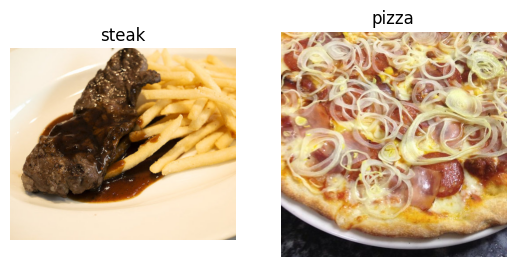

In [23]:
# visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image(target_dir="pizza_steak/train/",
                              target_class="steak")
plt.subplot(1, 2, 2)
steak_img = view_random_image(target_dir="pizza_steak/train/",
                              target_class="pizza")

### 2. Preprocess the data (prepare it for a model)

In [24]:
# define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

next step is to turn the data into **batches**

a batch is a small subset of data. rather than look at all -10000 images at a time, a model might only look at 32 at a time. it does this for a couple of reasons:
1. 10000 images (or more) might not fit into the memory of your processor (GPU)
2. trying to learn the patterns in 10000 images in one hit could result in the model not being able to learn very well



In [25]:
!nvidia-smi

Sun Feb 23 19:19:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   70C    P0             32W /   70W |    1690MiB /  15360MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [26]:
# create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
# load in the image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, #target directory of images
                                               target_size=(224, 224), # target size of images (height, width)
                                               class_mode="binary", #type of data youre working with
                                               batch_size=32) #size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [28]:
# get a sample of a train data batch
images, labels = next(train_data) # get the "next" batch of images/ labels in train_data
len(images), len(labels)

(32, 32)

In [29]:
# how many batches are there?
len(train_data)

47

it's 47 batches because I have

1500 images / 32 batches = 47 batches in total

In [30]:
# get the first two images
images[:2], images[0].shape

(array([[[[0.56078434, 0.63529414, 0.79215693],
          [0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          ...,
          [0.07843138, 0.08235294, 0.05882353],
          [0.08235294, 0.08235294, 0.07450981],
          [0.09803922, 0.09803922, 0.09803922]],
 
         [[0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          ...,
          [0.09803922, 0.10196079, 0.07058824],
          [0.0627451 , 0.06666667, 0.04705883],
          [0.04313726, 0.04313726, 0.03529412]],
 
         [[0.5686275 , 0.6431373 , 0.8078432 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          [0.5647059 , 0.6392157 , 0.8078432 ],
          ...,
          [0.07450981, 0.07843138, 0.04705883],
          [0.15686275, 0.16078432, 0.13725491],
          [0.21568629, 0.21960786, 0.20000002]],
 
         ...,
 
         [[0.3921569 , 0.34901962, 0.22352943],
          [0.39607

### 3. create a CNN model (start with a baseline)

a baseline is relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

In [31]:
# make the creating of the model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# create the model (this will be the baseline, a layer convolutional neural network)


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model_4 = Sequential([
  Conv2D(filters=10,
        kernel_size=3,
        strides=1,
        padding="valid",
        activation="relu",
        input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layer (working with binary classification, so only 1 output neuron)
])

model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

alternative:
model_4 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),  # Fügt eine Reduktion der räumlichen Dimensionen hinzu
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dropout(0.5),  # Reduziert Overfitting
    Dense(1, activation="sigmoid")
])
model_4.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [33]:
# get a summary of our model
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

### 4. Fit the model

In [34]:
# check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [35]:
steps_per_epoch = train_data.samples // train_data.batch_size
validation_steps = test_data.samples // test_data.batch_size

In [36]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=steps_per_epoch, # vorher steps_per_epoch=len(train_data)
                        validation_data=test_data,
                        validation_steps=validation_steps) # vorher validation_steps=len(test_data))

Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 14s 186ms/step - accuracy: 0.5788 - loss: 1.3821 - val_accuracy: 0.7083 - val_loss: 0.5719
Epoch 2/5
 1/46 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6875 - loss: 0.6121

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6875 - loss: 0.6121 - val_accuracy: 0.7021 - val_loss: 0.5770
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.7380 - loss: 0.5026 - val_accuracy: 0.8125 - val_loss: 0.4703
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8438 - loss: 0.3946 - val_accuracy: 0.7958 - val_loss: 0.4856
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8522 - loss: 0.4043 - val_accuracy: 0.8438 - val_loss: 0.3968


In [37]:
print(history_4.history)

{'accuracy': [0.5974114537239075, 0.6875, 0.7588555812835693, 0.84375, 0.8623978495597839], 'loss': [0.9596445560455322, 0.6121299266815186, 0.5082842111587524, 0.39462459087371826, 0.3687395751476288], 'val_accuracy': [0.7083333134651184, 0.7020833492279053, 0.8125, 0.7958333492279053, 0.84375], 'val_loss': [0.5718929767608643, 0.5769879221916199, 0.4702948331832886, 0.48560604453086853, 0.39679083228111267]}


In [38]:
print(f"Train steps: {len(train_data)}, Validation steps: {len(test_data)}")

# Überprüfe ein Beispiel aus dem Generator
for i, (x_batch, y_batch) in enumerate(train_data):
    print(f"Batch {i}: X shape: {x_batch.shape}, Y shape: {y_batch.shape}")
    if i > 5:  # Nur die ersten 5 Batches prüfen
        break

Train steps: 47, Validation steps: 16
Batch 0: X shape: (32, 224, 224, 3), Y shape: (32,)
Batch 1: X shape: (32, 224, 224, 3), Y shape: (32,)
Batch 2: X shape: (32, 224, 224, 3), Y shape: (32,)
Batch 3: X shape: (32, 224, 224, 3), Y shape: (32,)
Batch 4: X shape: (32, 224, 224, 3), Y shape: (32,)
Batch 5: X shape: (32, 224, 224, 3), Y shape: (32,)
Batch 6: X shape: (32, 224, 224, 3), Y shape: (32,)


In [39]:
print(f"Train samples: {train_data.samples}, Batch size: {train_data.batch_size}")
print(f"Validation samples: {test_data.samples}, Batch size: {test_data.batch_size}")

Train samples: 1500, Batch size: 32
Validation samples: 500, Batch size: 32


### 5. evaluating the model
it looks like the model is learning somethin, lets evaluate it

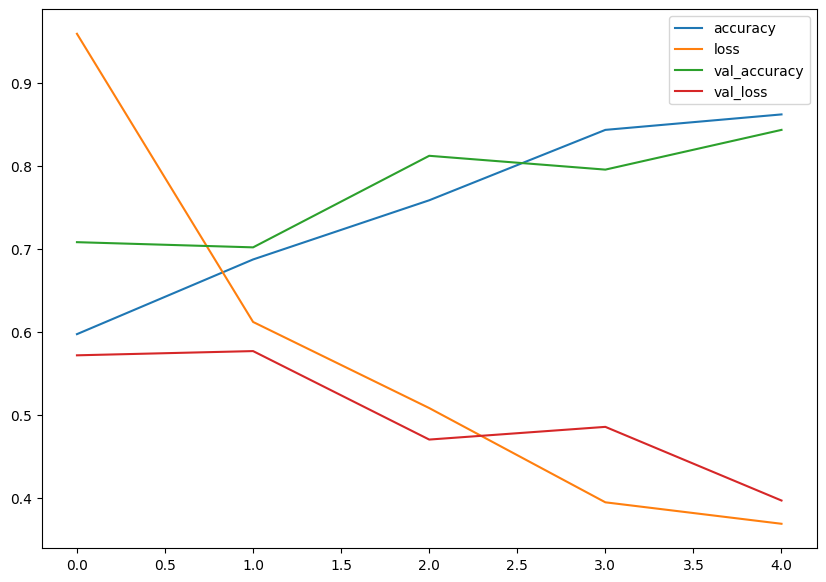

In [40]:
import pandas as pd

# Convert the history to a DataFrame
history_df = pd.DataFrame(history_4.history)

# Check for columns with different lengths
column_lengths = {col: len(history_df[col]) for col in history_df.columns}
if len(set(column_lengths.values())) > 1:
    # Find the minimum length among the columns
    min_length = min(column_lengths.values())

    # Truncate all columns to the minimum length
    history_df = history_df.iloc[:min_length]

# Plot the DataFrame
history_df.plot(figsize=(10, 7));

In [41]:
# plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

when a models validation loss starts to increase, its likely that the model is overfitting the training dataset. this means, its learning the patterns in the training dataset too well and thus the models ability to generalize to unseen data will be diminished.

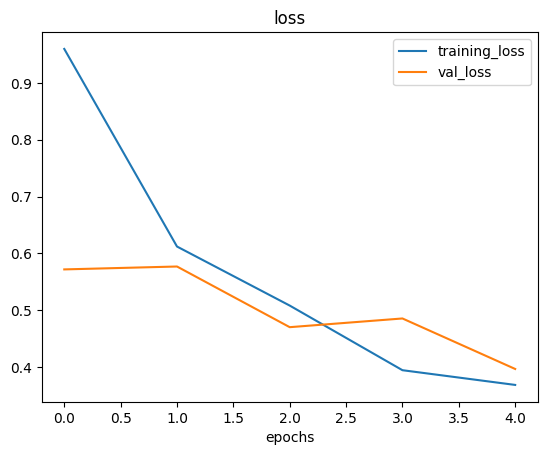

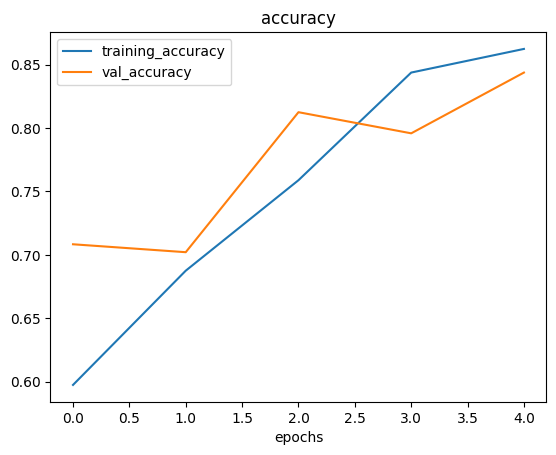

In [42]:
# check out the loss and accuracy
plot_loss_curves(history_4)

### 6. adjust the model parameters

fitting a machine learning model comes in 3 steps:

0. create a baseline
1. beat the baseline by overfitting a larger model
2. reduce overfitting

ways to induce overfitting:

* increase the number of conv layers
* increase the number of conv filters
* add another dense layer to the output of our flattened layer

reduce overfitting:
* add data augmentation
* add regularization layers (such as MaxPool2D)
* add more data...

reducing overfitting = regularization

In [43]:
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [45]:
# fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=steps_per_epoch, # vorher steps_per_epoch=len(train_data)
                        validation_data=test_data,
                        validation_steps=validation_steps)

Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 0.5925 - loss: 0.6927 - val_accuracy: 0.7312 - val_loss: 0.5514
Epoch 2/5
 1/46 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6875 - loss: 0.6342

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6875 - loss: 0.6342 - val_accuracy: 0.7479 - val_loss: 0.5389
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 15s 122ms/step - accuracy: 0.7684 - loss: 0.5276 - val_accuracy: 0.8188 - val_loss: 0.4227
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8125 - loss: 0.4800 - val_accuracy: 0.8167 - val_loss: 0.4205
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.7976 - loss: 0.4482 - val_accuracy: 0.7979 - val_loss: 0.4242


In [46]:
# get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

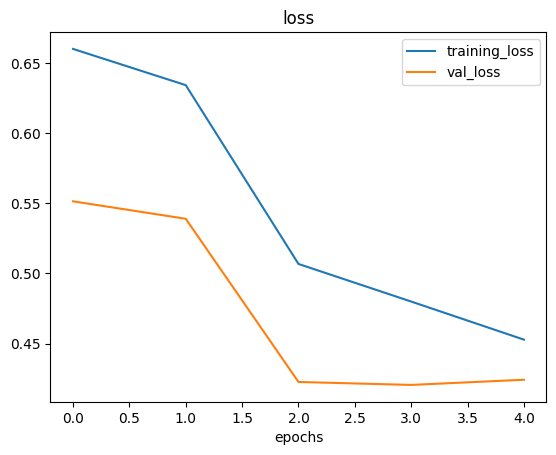

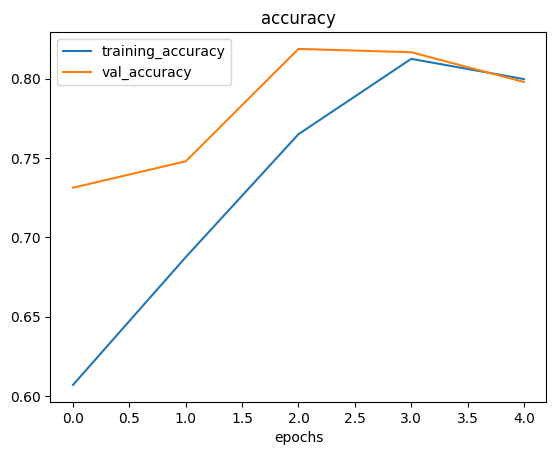

In [47]:
# plot the loss curves
plot_loss_curves(history_5)

In [48]:
# create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image
                                             shear_range=0.2, # how much do you want to shear an image
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # want to flip the image?

# create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

what is data augmentation?

its the process of altering training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

lets visualize data augmentation

In [49]:
# import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demo purpose

# import data and do not augment it from training directory
print("Non-Augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")



Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


data augmentation is usually only performed on the training data. using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

lets visualize augmented data

In [50]:
from ast import AugAssign
# get sample data batches
images, labels = next(train_data) # to be provided with the next batch of images and labels
augmented_images, augmented_labels = next(train_data_augmented) # labels aren't augmented, omly data (images)

showing image number: 7


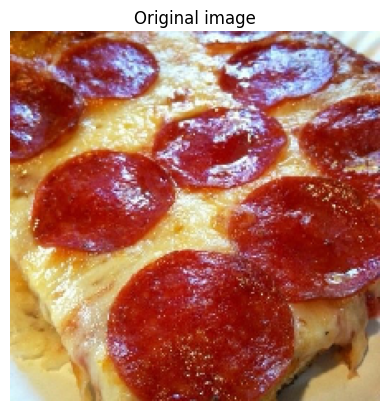

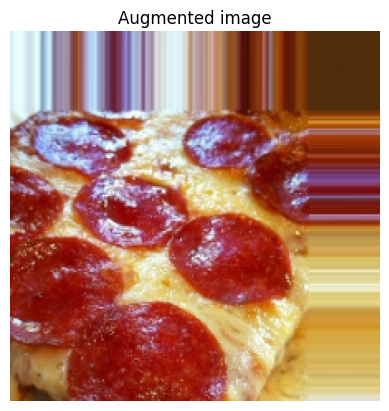

In [51]:
# show original image and augmented image, to display them sequentially (thats why I set shuffle=false)
import random
random_number = random.randint(0, 32) # because the batch sized are 32
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

after showing how augmented training data looks like, lets build a model and see how it learns on augmented data

In [52]:
steps_per_epoch = train_data.samples // train_data.batch_size
validation_steps = test_data.samples // test_data.batch_size

In [53]:
# calculate steps_per_epoch and validation_steps based on the amount of data and batch size
steps_per_epoch = len(train_data_augmented) // train_data_augmented.batch_size
validation_steps = len(test_data) // test_data.batch_size

# create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

learning_rate = 0.0001 # reducing the learning rate to avoid instability
optimizer = Adam(learning_rate=learning_rate)

# compiling
model_6.compile(loss="binary_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])

# early stop
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# fitting the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=steps_per_epoch, # before: steps_per_epoch=len(train_data)
                        validation_data=test_data,
                        validation_steps=validation_steps
                        #callbacks=[early_stopping]
                        )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.9062 - loss: 0.6752 - val_accuracy: 0.4760 - val_loss: 0.6937
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9688 - loss: 0.6743 - val_accuracy: 0.4940 - val_loss: 0.6943
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.6633 - val_accuracy: 0.4980 - val_loss: 0.6950
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.6592 - val_accuracy: 0.5000 - val_loss: 0.6958
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.6508 - val_accuracy: 0.5000 - val_loss: 0.6968


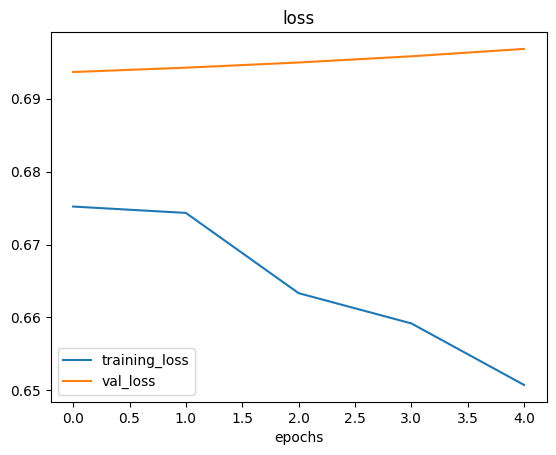

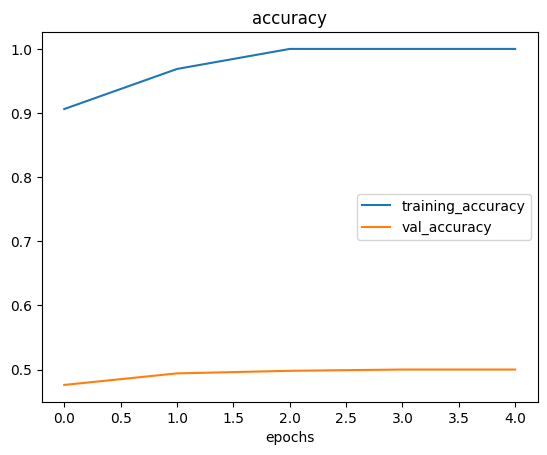

In [54]:
# check our models training cu
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens


In [55]:
# import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode="binary",
                                                                   batch_size=32,
                                                                   shuffle=True)


Found 1500 images belonging to 2 classes.


In [56]:
steps_per_epoch = train_data_augmented_shuffled.samples // train_data_augmented_shuffled.batch_size
validation_steps = test_data.samples // test_data.batch_size

In [57]:
# create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# fit the model

history_7 = model_7.fit(train_data_augmented_shuffled,# fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=steps_per_epoch,
                        validation_data=test_data,
                        validation_steps=validation_steps)

Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 23s 451ms/step - accuracy: 0.5800 - loss: 0.6629 - val_accuracy: 0.7479 - val_loss: 0.5404
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6562 - loss: 0.6842 - val_accuracy: 0.7437 - val_loss: 0.5371
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 41s 499ms/step - accuracy: 0.7118 - loss: 0.5781 - val_accuracy: 0.7854 - val_loss: 0.4591
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7500 - loss: 0.5140 - val_accuracy: 0.8146 - val_loss: 0.4291
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 41s 527ms/step - accuracy: 0.7559 - loss: 0.5225 - val_accuracy: 0.8438 - val_loss: 0.3608


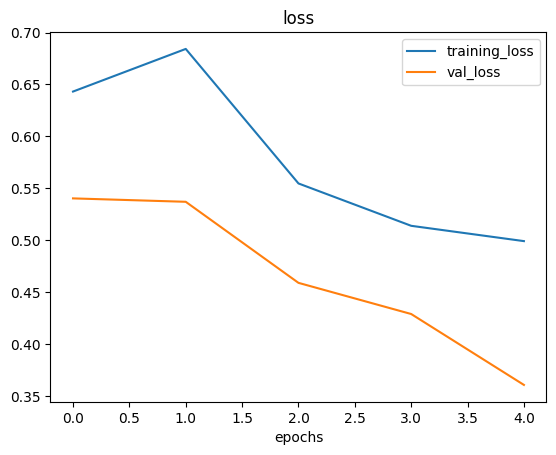

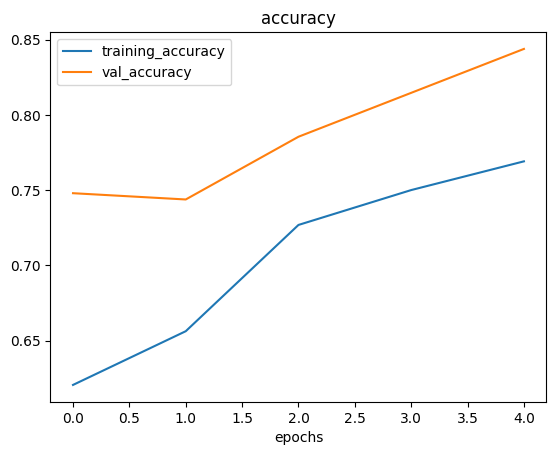

In [58]:
plot_loss_curves(history_7)

when shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

ways to improve a deep model:
- adding layers
- increase the number of hidden units
- change the activation functions
- change the optimization function
- change the learning rate
- fitting on more data
- fittin for longer

### 7. repeat until satisfied
I#ve already beaten the baseline, there are a few things i could try to continue to improve the model
* increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* train for longer (more epochs)
* find an ideal learning rate
* get more data (give the model more opportunities to learn)
* us **transfer learning* to leverage what another image model has learn and adjust it for the own use case


## Making a prediction with our trained model on my own custom data

In [59]:
# classes we're working with
print(class_names)

['pizza' 'steak']


--2025-02-23 19:22:48--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg [following]
--2025-02-23 19:22:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2025-02-23 19:22:49 (45.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/19

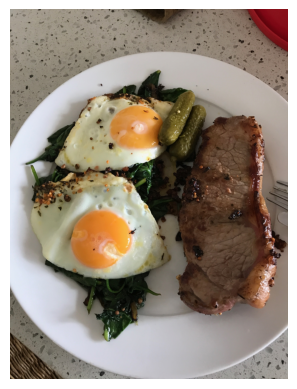

In [60]:
# view an example image
import matplotlib.image as mpimg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg -O 03-steak.jpeg # changed the URL to download raw content and save it with -O
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [61]:
# checkin the shape of the image
steak.shape

(4032, 3024, 3)

In [62]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

when you train a neural network and you want to make a prediction with it on your own custom data, its importan that the custom data (or new data) is preprocessed into the same format as the data your model was trained on

In [63]:
expanded_steak = tf.expand_dims(steak, axis=0)

In [64]:
# create a function to import an image and resize it to be able to be used with my model

def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels).
  """
  # read in target file (an image)
  img = tf.io.read_file(filename)

  # decode the read file into a tensor & ensure 3 color channels
  img = tf.image.decode_image(img, channels=3)

  # resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [65]:
# load in and preprocess the custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [66]:
# printing out prediction probability "how likely an image belongs to one class or another"
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


array([[0.8590863]], dtype=float32)

the value always tend to 1 or 0. this array value of 0.92xxx tends to class value 1, what is the steak class in my case

looks like the custom image is being put through the model, however, it currently outputs a prediction probability, wouldnt it be nice if I could visualize the image as well as the models prediction?

In [67]:
# reminding the class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [68]:
# index the predicted class by rounding the predicition probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [69]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # import the target image and preprocess it
  img = load_and_prep_image(filename)

  # make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


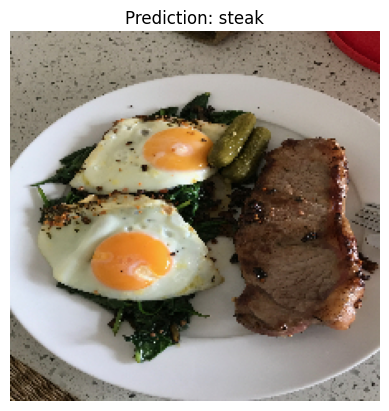

In [70]:
# test the modell on custom image
pred_and_plot(model_7, "03-steak.jpeg")

the model works, lets try another one

--2025-02-23 19:22:52--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg [following]
--2025-02-23 19:22:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza.jpeg’

03-pizza.jpeg       100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2025-02-23 19:22:53 (54.6 MB/s) - ‘03-pizza.jpeg’ saved

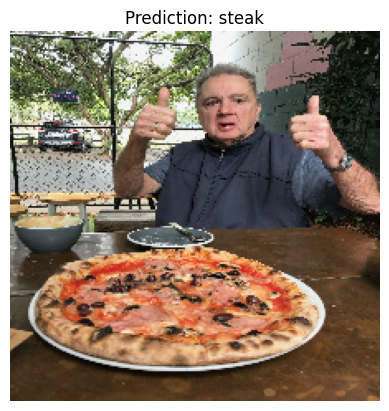

In [71]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg -O 03-pizza.jpeg
# Ensures that it downloads the right picture using the original url
# -O flag ensures that it is saved as '03-pizza.jpeg' in the current working directory

pred_and_plot(model_7, "03-pizza.jpeg")

# multi class image classification

we've just been through a bunch of the following steps with a binary classification problem (pizza vs steak), now we're going to step things up a notch with 10 classes of food (multi class classification)

1. become one with the data
2. preprocess the data (get it ready for a model)
3. create a model (start with a baseline)
4. fit the model (overfit it to make sure it works)
5. evaluate the model
6. adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. repeat until satisfied

In [72]:
### import and become one with the data

In [73]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-02-23 19:22:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  25.8MB/s    in 7.9s    

2025-02-23 19:23:01 (63.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [74]:
import os

# walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

In [75]:
# setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [76]:
# get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2748917.jpg']
Image shape: (288, 512, 3)


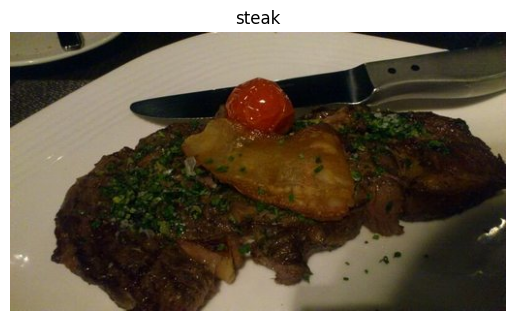

In [77]:
# visualizing
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))



In [78]:
random.choice(class_names)

'ramen'

### Preprocess the data (prepare it for a model)

In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen =  ImageDataGenerator(rescale=1/255.)

# load data in from directory and turnem into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical"
                                               )

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical"
                                               )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### create a model (start with baseline)
CNN explainer website mode - replica

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation # Import Activation

# create the model
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # changed to have 10 output neurons and use the softmax activation function
])

# compiling
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

steps_per_epoch = train_data.samples // train_data.batch_size
validation_steps = test_data.samples // test_data.batch_size

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=steps_per_epoch, # vorher steps_per_epoch=len(train_data)
                        validation_data=test_data,
                        validation_steps=validation_steps, # vorher validation_steps=len(test_data))
# alle .fits hierauf anpassen

In [81]:
history_8 = model_8.fit(train_data,# fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=steps_per_epoch,
                        validation_data=test_data,
                        validation_steps=validation_steps)

Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.0834 - loss: 2.3205 - val_accuracy: 0.1562 - val_loss: 2.2793
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 222ms/step - accuracy: 0.1709 - loss: 2.2524 - val_accuracy: 0.1854 - val_loss: 2.1933
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.2134 - loss: 2.1564 - val_accuracy: 0.1958 - val_loss: 2.1244
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - accuracy: 0.2802 - loss: 2.0244 - val_accuracy: 0.2333 - val_loss: 2.1061
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.3683 - loss: 1.8472 - val_accuracy: 0.2313 - val_loss: 2.1813


In case of having epochs with 0s runtime and 0.00 values:

steps_per_epoch = train_data_augmented_shuffled.samples // train_data_augmented_shuffled.batch_size
validation_steps = test_data.samples // test_data.batch_size

or

steps_per_epoch = train_data.samples // train_data.batch_size validation_steps = test_data.samples // test_data.batch_size

history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=steps_per_epoch, # vorher steps_per_epoch=len(train_data) validation_data=test_data, validation_steps=validation_steps, # vorher validation_steps=len(test_data))



or

at fitting the model reduce the steps per epoch and/or validation steps to 25% of train/test-data, like:

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=int(0.25 * len(train_data)),
                        validation_data=valid_data,
                        validation_steps=int(0.25*len(test_data)))

### 5. Evaluate the model

In [82]:
# evaluate on test data
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.2501 - loss: 2.1200


[2.1407105922698975, 0.23520000278949738]

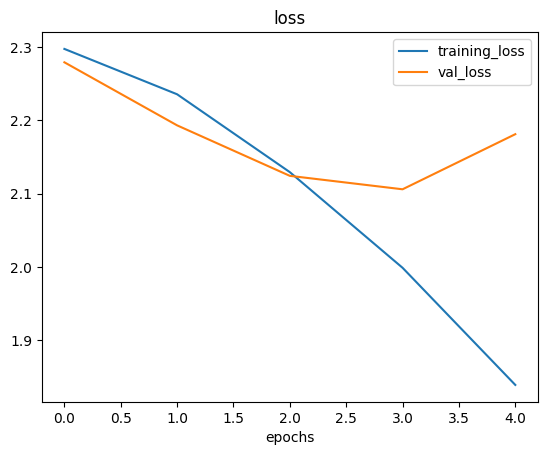

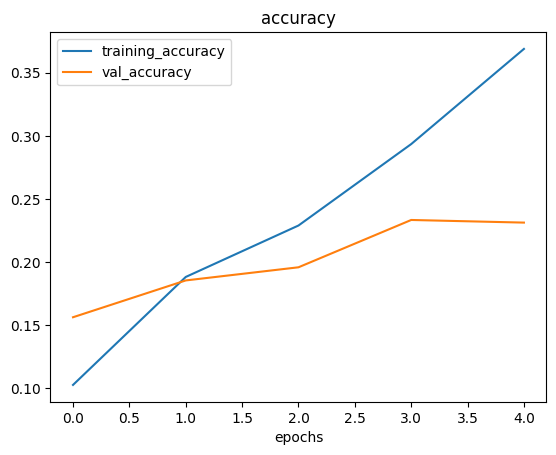

In [83]:
#checking models loss curves on the 10 classes
plot_loss_curves(history_8)

### 6. adjust the model hyperparameters (to beat the baseline/ reduce overfitting)

due to its performance on the training data, its clear the model is learning at least something
however it is not generalizing well to unseen data (overfitting)
so, lets try and fix overfitting by...
* *get more data* - having more data gives a model more opportunity to learn diverse patterns
* *simplify the model* - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # units in layers
* *use data augmentation* - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* *User transfer learning* - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [84]:
# how about to try and simplify the model first:
# lets try to remove 2 convolutional layers because when a CNN is to deep into the train data, it would not get the patterns of test data, at least its more difficult
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # changed to have 10 output neurons and use the softmax activation function
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [85]:
# fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                         steps_per_epoch=int(0.9 * len(train_data)),#steps_per_epoch,
                        validation_data=test_data,
                         validation_steps=int(0.9*len(test_data))) #validation_steps)

Epoch 1/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 27s 118ms/step - accuracy: 0.1754 - loss: 2.3828 - val_accuracy: 0.3160 - val_loss: 1.9414
Epoch 2/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.3532 - loss: 1.8716 - val_accuracy: 0.3125 - val_loss: 1.9452
Epoch 3/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 41s 195ms/step - accuracy: 0.3749 - loss: 1.8406 - val_accuracy: 0.3358 - val_loss: 1.9065
Epoch 4/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.5114 - loss: 1.4987 - val_accuracy: 0.3297 - val_loss: 1.9876
Epoch 5/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 25s 117ms/step - accuracy: 0.5102 - loss: 1.4752 - val_accuracy: 0.3006 - val_loss: 2.0006


In [86]:
model_8.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

In [87]:
model_9.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │         291,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 878,402 (3.35 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 585,602 (2.23 MB)

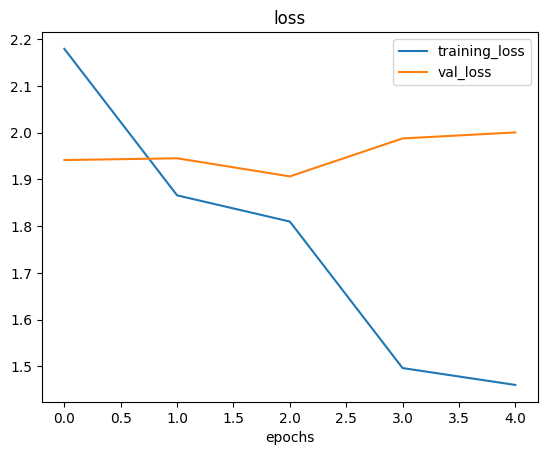

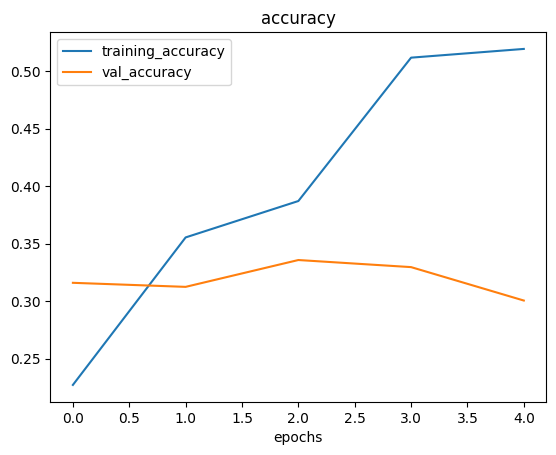

In [88]:
#checking the loss curves
plot_loss_curves(history_9)

### trying to reduce overfitting with data augmentation

improving models results by using augmented training data

idealy to
* reduce overfitting (get the train and validation curves closer)
* improve validation accuracy

In [89]:
# create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode="categorical",
                                                                   batch_size=32)

Found 7500 images belonging to 10 classes.


In [90]:
# creating another model, this time fit it on the augmented data
model_10 = tf.keras.models.clone_model(model_8)

# compile the cloned model using the same setup as previous models
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


In [91]:
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=int(0.9 * len(train_data)),
                          validation_data=test_data,
                          validation_steps=int(0.9*len(test_data)))

Epoch 1/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 95s 441ms/step - accuracy: 0.1305 - loss: 2.2892 - val_accuracy: 0.1633 - val_loss: 2.1871
Epoch 2/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.1916 - loss: 2.1852 - val_accuracy: 0.2284 - val_loss: 2.1404
Epoch 3/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 141s 670ms/step - accuracy: 0.2026 - loss: 2.1565 - val_accuracy: 0.2161 - val_loss: 2.1195
Epoch 4/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.2418 - loss: 2.1363 - val_accuracy: 0.2927 - val_loss: 2.0199
Epoch 5/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 142s 676ms/step - accuracy: 0.2558 - loss: 2.0966 - val_accuracy: 0.3231 - val_loss: 1.9244


In [92]:
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.2293 - loss: 2.1327


[2.1407108306884766, 0.23520000278949738]

In [93]:
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.3171 - loss: 1.9358


[1.9205876588821411, 0.32199999690055847]

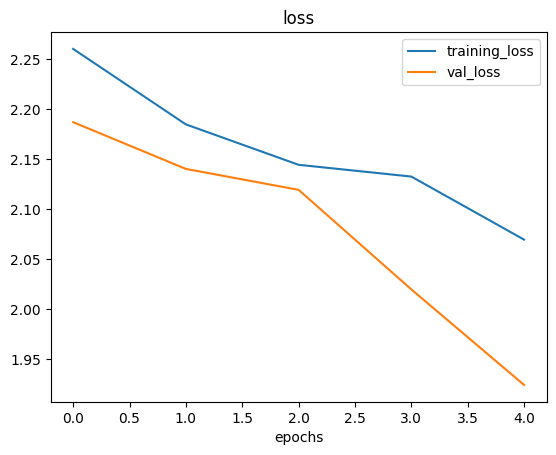

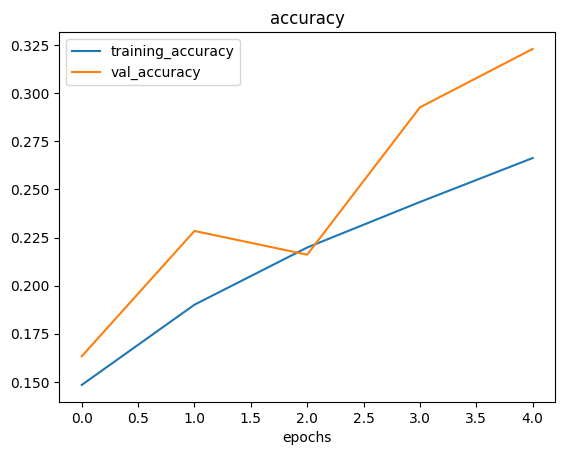

In [94]:
# check out the models trained on augmented data's loss curves
plot_loss_curves(history_10)

it looks much better, the loss curves are much closer to each other than the baseline model and they look like theyre heading in the right direction (certainly not the wrong direction) so if it would be trained for longer, there would be further imporvements

### repeat until satisfied

we could keep going here... continally trying to bring the loss curves closer together and trying to improve the validation/test accuracy.

How?

by running lots of experiments, namely:
- restructuring the models architecture (increasing layers/ hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in the ImageDataGenerator instance)
- train for longer e.g. 10 epochs instead of 5 epochs
- try **transfer learning**

### Making a prediction with the trained model

lets use the trained model to make some predictions on my custom images


In [95]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [96]:
# download custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

--2025-02-23 19:33:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2025-02-23 19:33:09 (52.4 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2025-02-23 19:33:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting res

In [97]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [98]:
# reconfig pred_and_plot function to work with multiclass images

def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # import the target image and preprocess it
  img = load_and_prep_image(filename)

  # make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  print(len(pred[0]))
  print(tf.argmax(pred))

  # add in logic for multi class and get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
10
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


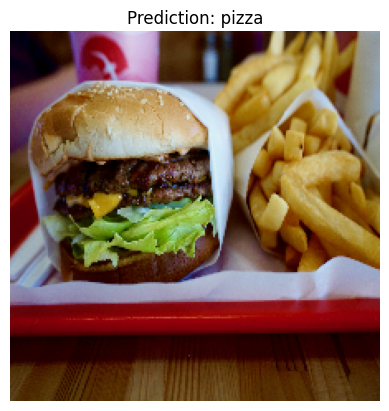

In [99]:
# make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)

looks like the model didnt perform very well on the custom images but this because it only achieved -39% accuracy on the test data. I can expect it to function quiete poorly on other unseen data.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1
tf.Tensor([0], shape=(1,), dtype=int64)


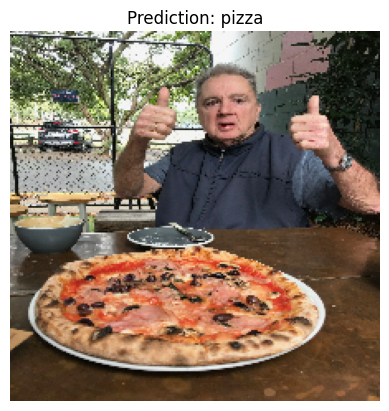

In [102]:
# the updated pred_and_plot function works for binary classification too
pred_and_plot(model=model_3, # because it was trained on pizza vs steak
              filename="03-pizza-dad.jpeg",
              class_names=["pizza", "steak"])

In [103]:
### saving and loading our model

### saving and loading the model


In [106]:
# save the model using the .keras extension
model_10.save("saved_trained_model_10.keras")

In [107]:
# load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10.keras")
loaded_model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.3232 - loss: 1.8988


[1.920588493347168, 0.32199999690055847]

In [108]:
# compare the loaded model to the existing model
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.3128 - loss: 1.9225


[1.9205882549285889, 0.32199999690055847]